<div style="text-align:center; font-family: Times New Roman, serif;">
<span style="color:Orange; font-family: Times New Roman, serif; font-weight: bold;">
<span class="cm-header cm-header-1">
Handwritten Digits Recognition </span>
</div>

##### -   To classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.


### Problem Statement

-  Prepare a complete data analysis report on the given data.
-  Classify a given image of a handwritten digit into one of the 10 classes
representing integer values from 0 to 9.
-  Compare between various models and find the classifier that works
better.

### Dataset

-  About the dataset: The dataset consists of 10 classes of handwritten Images pictures each with a number between 0-9.


-  The MNIST dataset is a popular dataset in machine learning and computer vision, and it consists of 70,000 grayscale images of handwritten digits from 0 to 9. Each image is 28x28 pixels in size, and there are 60,000 training images and 10,000 test images.

### Importing libraries

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression


### Loading the dataset

In [3]:
#loading the preshuffled train and test data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
# Check the shape of the dataset
print("Training dataset shape:", x_train.shape)
print("Test dataset shape:", x_test.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

Training dataset shape: (60000, 28, 28)
Test dataset shape: (10000, 28, 28)
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


-  We then print out the shape of the training and test datasets to verify that they have been loaded correctly.


## EDA

##### Visualizing some sample images from the dataset


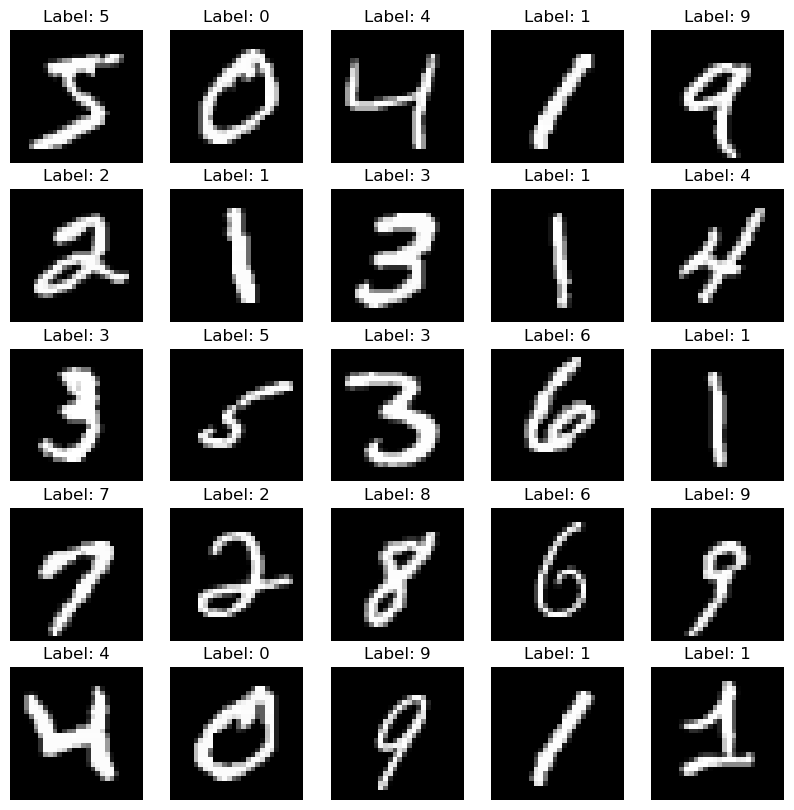

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: {}".format(y_train[i]))
    plt.axis('off')
plt.show()


-  we visualized some sample images from the dataset using the imshow() function from matplotlib.
-  We also display the label of each image as its title.



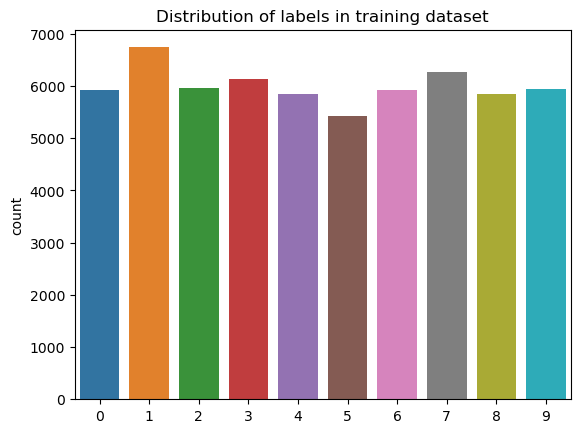

In [6]:
# Check the distribution of the labels in the training dataset
sns.countplot(y_train)
plt.title("Distribution of labels in training dataset")
plt.show()


-  We then use the seaborn library to create a countplot of the distribution of labels in the training dataset. This helps us understand how many images we have for each digit.
-  its a multiclass classification



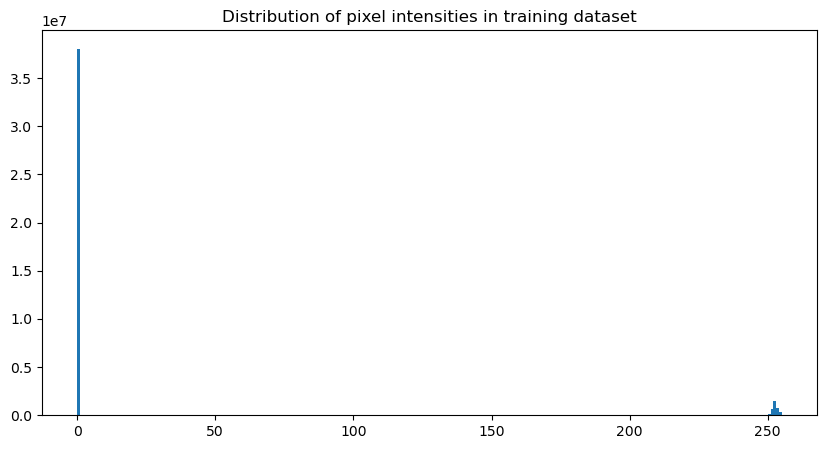

In [7]:
# Check the distribution of pixel intensities in the images
plt.figure(figsize=(10, 5))
plt.hist(x_train.flatten(), bins=256)
plt.title("Distribution of pixel intensities in training dataset")
plt.show()


-  Finally, we create a histogram of the distribution of pixel intensities in the images. This can help us understand the range of values that the pixels can take, and whether there are any outliers or unusual patterns in the data.





## Data preprocessing

### Reshaping the dataset

-  As mentioned earlier, the MNIST dataset contains images represented as a two-dimensional array of 28x28 pixels. To use these images as input for machine learning models, we need to reshape them into a one-dimensional array of 784 (28x28) element

In [8]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

### Normalizing the pixel values

-  The pixel values in the MNIST dataset range from 0 to 255, representing the grayscale intensity of each pixel. To make it easier for the machine learning algorithm to learn from the data, we normalize the pixel values to fall within a range of 0 to 1. This is done by dividing each pixel value by 255.


In [9]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


### One-hot encoding the labels

-  The labels in the MNIST dataset are represented as integers from 0 to 9, indicating the digit that each image represents. However, machine learning algorithms typically require labels to be in a one-hot encoded format, which means that each label is represented as a binary vector of length 10, where the index corresponding to the digit is set to 1 and all other indices are set to 0.



In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [11]:
print('x_train', x_train.shape)
print(x_train.shape[0],'Train Sample')
print(x_test.shape[0],'Test Sample')


x_train (60000, 28, 28, 1)
60000 Train Sample
10000 Test Sample


### breaking training set into training and validation sets


In [12]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]


In [13]:
# print shape of training set
print('x_train shape:', x_train.shape)
# the 3 is referring to colored image
# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (55000, 28, 28, 1)
55000 train samples
10000 test samples
5000 validation samples


### Defining CNN Model Architechture 

In [14]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),padding='same', activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(192,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(264,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [15]:
from keras.optimizers import Adadelta, RMSprop, Adam
from keras.losses import categorical_crossentropy
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score


In [16]:
# compile the model
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
# Model training

history=model.fit(x_train,y_train , batch_size=128,epochs=100,validation_data=(x_valid, y_valid),verbose=1, shuffle=True)


Epoch 1/100
430/430 [==============================] - 40s 91ms/step - loss: 0.2936 - accuracy: 0.9042 - val_loss: 0.0615 - val_accuracy: 0.9798
Epoch 2/100
430/430 [==============================] - 39s 90ms/step - loss: 0.0718 - accuracy: 0.9772 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch 3/100
430/430 [==============================] - 39s 90ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0389 - val_accuracy: 0.9900
Epoch 4/100
430/430 [==============================] - 39s 90ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0399 - val_accuracy: 0.9894
Epoch 5/100
430/430 [==============================] - 39s 91ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0307 - val_accuracy: 0.9914
Epoch 6/100
430/430 [==============================] - 39s 91ms/step - loss: 0.0307 - accuracy: 0.9908 - val_loss: 0.0259 - val_accuracy: 0.9930
Epoch 7/100
430/430 [==============================] - 39s 91ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0318 - val_ac

In [18]:
accuracy = history.history['accuracy']
accuracy

[0.904236376285553,
 0.9772363901138306,
 0.9839636087417603,
 0.9869999885559082,
 0.9885272979736328,
 0.9907636642456055,
 0.991454541683197,
 0.9920363426208496,
 0.9930545687675476,
 0.9937090873718262,
 0.9941818118095398,
 0.9947999715805054,
 0.994527280330658,
 0.9949454665184021,
 0.9955454468727112,
 0.9954363703727722,
 0.9957636594772339,
 0.9968545436859131,
 0.9960908889770508,
 0.9962363839149475,
 0.9972000122070312,
 0.9966182112693787,
 0.9973999857902527,
 0.9965636134147644,
 0.996999979019165,
 0.9971091151237488,
 0.996436357498169,
 0.9974363446235657,
 0.9977090954780579,
 0.998018205165863,
 0.9972545504570007,
 0.9979090690612793,
 0.9975636601448059,
 0.9978908896446228,
 0.9976363778114319,
 0.9983454346656799,
 0.9976363778114319,
 0.9979272484779358,
 0.9981818199157715,
 0.99798184633255,
 0.998054563999176,
 0.9982908964157104,
 0.9982181787490845,
 0.9978908896446228,
 0.9983454346656799,
 0.9984545707702637,
 0.9986909031867981,
 0.9984181523323059,
 

In [19]:
val_accuracy = history.history['val_accuracy']
val_accuracy

[0.9797999858856201,
 0.9886000156402588,
 0.9900000095367432,
 0.9894000291824341,
 0.9914000034332275,
 0.9929999709129333,
 0.9908000230789185,
 0.9927999973297119,
 0.9918000102043152,
 0.9926000237464905,
 0.9929999709129333,
 0.9929999709129333,
 0.9937999844551086,
 0.9941999912261963,
 0.9936000108718872,
 0.9937999844551086,
 0.9945999979972839,
 0.9937999844551086,
 0.9937999844551086,
 0.9940000176429749,
 0.9941999912261963,
 0.9932000041007996,
 0.9937999844551086,
 0.9936000108718872,
 0.9919999837875366,
 0.9944000244140625,
 0.9941999912261963,
 0.9950000047683716,
 0.9937999844551086,
 0.9947999715805054,
 0.9941999912261963,
 0.9940000176429749,
 0.9937999844551086,
 0.9941999912261963,
 0.9940000176429749,
 0.9941999912261963,
 0.9936000108718872,
 0.9936000108718872,
 0.9936000108718872,
 0.9936000108718872,
 0.9927999973297119,
 0.9941999912261963,
 0.9937999844551086,
 0.9932000041007996,
 0.9932000041007996,
 0.9937999844551086,
 0.9941999912261963,
 0.9933999776

In [20]:
epochs = range(1, len(accuracy) + 1)


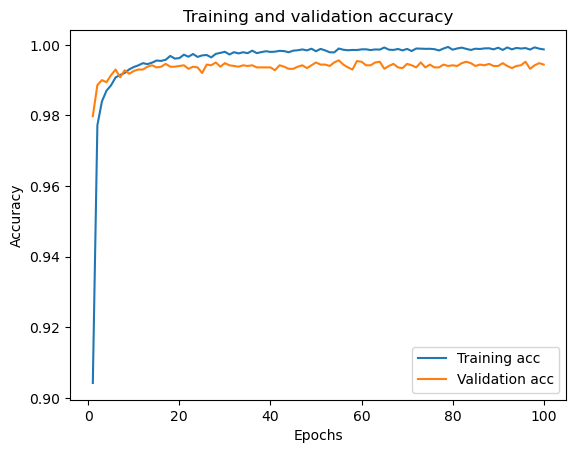

In [21]:
sns.lineplot(epochs, accuracy, label='Training acc')
sns.lineplot(epochs, val_accuracy, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



-  The training accuracy is represented by blue line and the validation accuracy is represented by a orange line.
-  We can see that the training and validation accuracy both increase over the epochs, and the validation accuracy is slightly lower than the training accuracy. 
-  This is a good indication that the model is learning from the training data and generalizing well to new data.

In [22]:
loss = history.history['loss']
loss

[0.2935976982116699,
 0.07182973623275757,
 0.05169414356350899,
 0.04177824780344963,
 0.03631073608994484,
 0.030695954337716103,
 0.027463719248771667,
 0.025552621111273766,
 0.022046782076358795,
 0.021142851561307907,
 0.018501875922083855,
 0.01605362631380558,
 0.016644852235913277,
 0.016425546258687973,
 0.014308137819170952,
 0.014291406609117985,
 0.012976816855370998,
 0.01005373802036047,
 0.011992424726486206,
 0.012376672588288784,
 0.009057271294295788,
 0.010589093901216984,
 0.008895371109247208,
 0.010630771517753601,
 0.008880002424120903,
 0.009025733917951584,
 0.011200778186321259,
 0.007628737948834896,
 0.006735046859830618,
 0.005996694788336754,
 0.00881172250956297,
 0.00773406820371747,
 0.00788791012018919,
 0.0072338515892624855,
 0.007203316781669855,
 0.005097332410514355,
 0.007712290156632662,
 0.0066315955482423306,
 0.005699801724404097,
 0.007147197145968676,
 0.006278681568801403,
 0.005345459096133709,
 0.006139739882200956,
 0.00791904702782631

In [23]:
val_loss = history.history['val_loss']
val_loss

[0.06145187467336655,
 0.04172752425074577,
 0.038861993700265884,
 0.03993043676018715,
 0.030684631317853928,
 0.025911057367920876,
 0.031804002821445465,
 0.02758120745420456,
 0.028922131285071373,
 0.0301104374229908,
 0.02978270873427391,
 0.02954326570034027,
 0.0233622957020998,
 0.021450158208608627,
 0.027134975418448448,
 0.02593611180782318,
 0.02293369546532631,
 0.02713708207011223,
 0.02806808240711689,
 0.02994801104068756,
 0.027280820533633232,
 0.03119100257754326,
 0.029904430732131004,
 0.027805328369140625,
 0.03545244783163071,
 0.023229075595736504,
 0.030156763270497322,
 0.026996269822120667,
 0.029787786304950714,
 0.035450518131256104,
 0.028768248856067657,
 0.031673792749643326,
 0.03309706598520279,
 0.03551243245601654,
 0.028797470033168793,
 0.039745036512613297,
 0.042044539004564285,
 0.03551787883043289,
 0.053138166666030884,
 0.036646876484155655,
 0.04574589803814888,
 0.049599044024944305,
 0.03932753950357437,
 0.03754002973437309,
 0.04275748

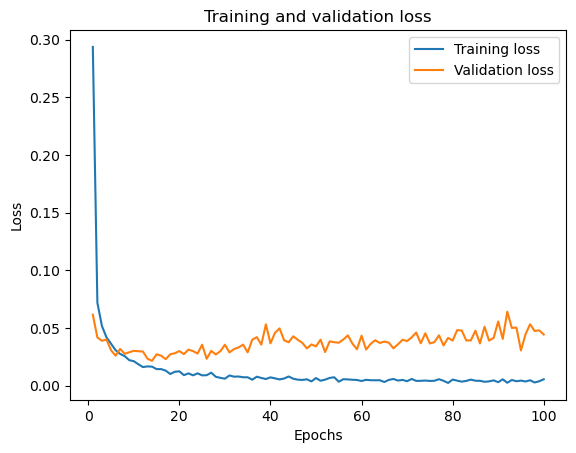

In [24]:
sns.lineplot(epochs, loss, label='Training loss')
sns.lineplot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

-  We can see that the training loss decreases continuously over the epochs, indicating that the model is learning from the training data. 
-  The validation loss decreases initially and then levels off, indicating that the model is not overfitting and generalizing well to new data.

#### Evaluation

In [25]:
y_hat=model.predict(x_test)
y_hat

313/313 [==============================] - 4s 13ms/step


array([[3.23781433e-33, 6.31802662e-22, 5.09903856e-21, ...,
        1.00000000e+00, 6.66991381e-28, 7.81041665e-22],
       [2.57555926e-32, 3.83860433e-21, 1.00000000e+00, ...,
        3.04170070e-27, 2.25669025e-24, 1.77340854e-36],
       [8.39116570e-20, 1.00000000e+00, 9.19251295e-19, ...,
        2.79765288e-17, 1.04349413e-17, 1.28448927e-25],
       ...,
       [4.15756694e-31, 3.04507089e-25, 3.93673974e-24, ...,
        3.59491803e-24, 2.70225338e-25, 1.36470044e-17],
       [6.48926158e-28, 0.00000000e+00, 1.11696884e-30, ...,
        2.18832060e-30, 3.70278450e-24, 1.02476324e-19],
       [4.27745044e-31, 1.68308781e-37, 2.21489527e-28, ...,
        0.00000000e+00, 1.52980672e-28, 2.07945321e-38]], dtype=float32)

In [26]:
# Evaluate the model on the test set
score=model.evaluate(x_test,y_test)
cnn_acc = 100*score[1]


313/313 [==============================] - 4s 13ms/step - loss: 0.0381 - accuracy: 0.9944


In [27]:
# print test accuracy
print('Test accuracy: %.4f%%' % cnn_acc)

Test accuracy: 99.4400%


In [28]:
# every no. these are the actual labels in the dataset

mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


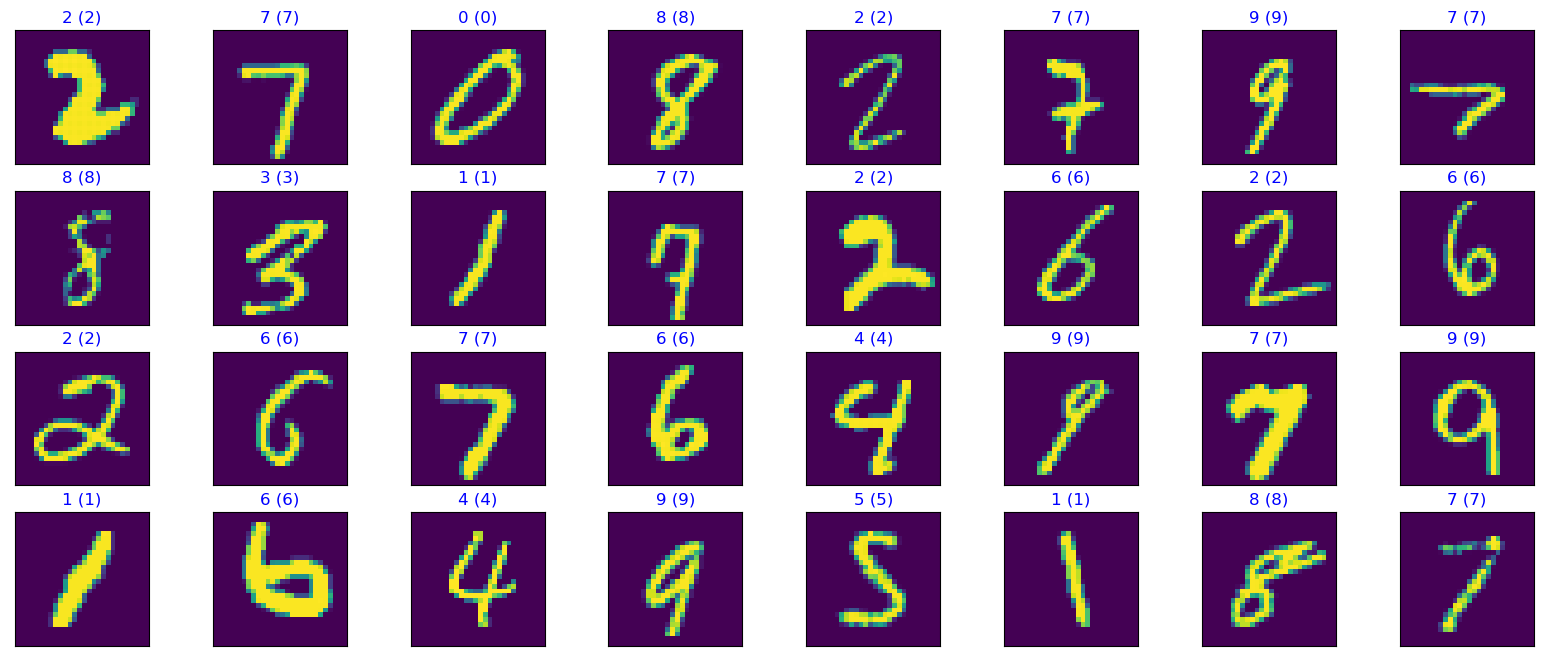

In [29]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax=fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))


# ANN

In [30]:
# Define the model architecture
# setting up the layers of the Neural  Network

model_ann = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')])

In [31]:
# Compile the model
model_ann.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
# Train the model
history_ann = model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.0179 - accuracy: 0.9957
Epoch 2/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0095 - accuracy: 0.9973
Epoch 3/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0113 - accuracy: 0.9973
Epoch 4/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0123 - accuracy: 0.9968
Epoch 5/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.0116 - accuracy: 0.9971
Epoch 6/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0115 - accuracy: 0.9972
Epoch 7/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0135 - accuracy: 0.9967
Epoch 8/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.0114 - accuracy: 0.9973
Epoch 9/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0117 - accuracy: 0.9971
Epoch 10/10
1719/1719 [==============================] - 59s 34m

In [33]:
ann_acc = model_ann.evaluate(x_test, y_test)
ann_acc = 100*score[1]

print('Test accuracy: %.4f%%' % ann_acc)

313/313 [==============================] - 1s 1ms/step - loss: 2.3356 - accuracy: 0.0884
Test accuracy: 99.4400%


In [34]:
print(x_test.shape)

(10000, 28, 28, 1)


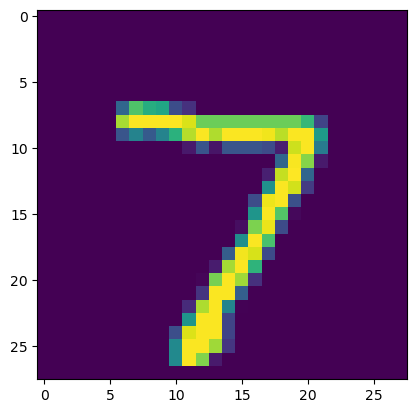

In [35]:
# first data point in X_test
plt.imshow(x_test[0])
plt.show()

In [36]:
Y_pred = model.predict(x_test)
print(Y_pred[0])

313/313 [==============================] - 5s 16ms/step
[1.0236287e-37 5.6748022e-20 4.7352612e-18 2.5021953e-21 3.7731525e-16
 1.6535510e-24 0.0000000e+00 1.0000000e+00 1.9228292e-29 9.5773841e-20]


In [37]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


### Trying with oter ML Models

#### Data preprocessing for modelling

In [38]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [39]:
print("Training dataset shape:", x_train.shape)
print("Test dataset shape:", x_test.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

Training dataset shape: (60000, 28, 28)
Test dataset shape: (10000, 28, 28)
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [41]:
# Reshape input data 
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


### scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train=scaler.transform(x_train)
x_train.shape

(60000, 784)

## KNN

In [43]:
# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [44]:
error_rate

[0.2553, 0.2649, 0.2301, 0.2152, 0.1957, 0.1975, 0.1871, 0.1864, 0.18, 0.1796]

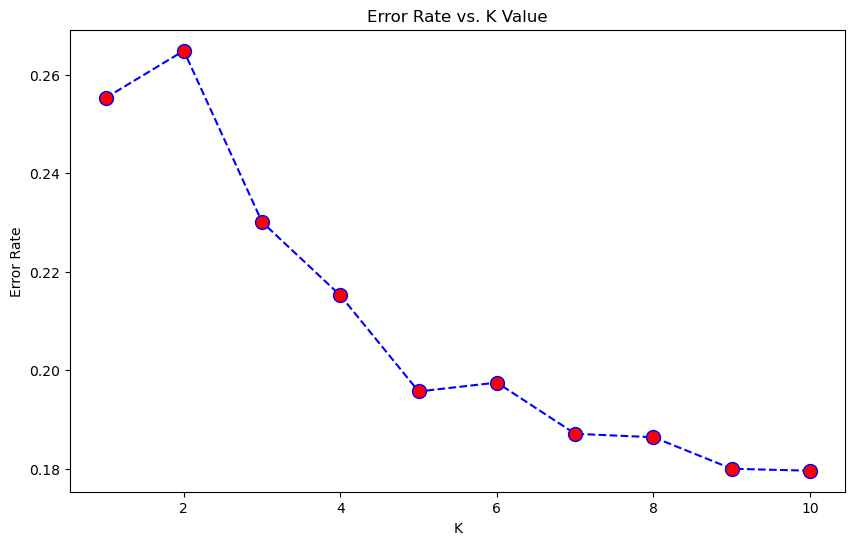

In [45]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred=classifier.predict(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
print(accuracy_score(y_test,y_pred))


0.8043


In [49]:
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train,y_train)
y_pred_7=classifier.predict(x_test)
y_pred_7

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [58]:
knn_acc=accuracy_score(y_test,y_pred_7)
knn_acc

0.8129

## SVC

In [51]:
clf=svm.SVC(kernel='linear',C=10,random_state=0)
clf.fit(x_train,y_train)
y_pred_svm=clf.predict(x_test)
y_pred_svm

array([7, 2, 8, ..., 4, 8, 6], dtype=uint8)

In [59]:
svc_acc=accuracy_score(y_test,y_pred_svm)
svc_acc

0.8205

In [53]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       980
           1       0.98      0.78      0.86      1135
           2       0.95      0.77      0.85      1032
           3       0.76      0.91      0.83      1010
           4       0.84      0.92      0.88       982
           5       0.98      0.31      0.47       892
           6       0.90      0.94      0.92       958
           7       0.99      0.78      0.87      1028
           8       0.52      0.95      0.68       974
           9       0.86      0.81      0.84      1009

    accuracy                           0.82     10000
   macro avg       0.86      0.82      0.81     10000
weighted avg       0.86      0.82      0.82     10000



##  LOGISTIC REGRESSION

In [54]:
log_classifier=LogisticRegression()
log_classifier.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred_log=log_classifier.predict(x_test)
y_pred_log

array([7, 2, 1, ..., 4, 8, 6], dtype=uint8)

In [60]:
lr_acc=accuracy_score(y_test,y_pred_log)
lr_acc

0.8372

## Model Comparision Report

In [61]:
models=pd.DataFrame({
    'Accuracy score' :[cnn_acc,ann_acc,knn_acc,svc_acc,lr_acc]},
    index=['CNN','ANN','KNN','SVC','Logistic Regression'])

models

,Accuracy score
CNN,99.440002
ANN,99.440002
KNN,0.812900
SVC,0.820500
Logistic Regression,0.837200
